In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import IsolationForest
from datetime import datetime
import ast


In [2]:
# Load dataset
df = pd.read_csv("dummy_content_data.csv")

# Convert usage_timestamp to datetime format
df['usage_timestamp'] = pd.to_datetime(df['usage_timestamp'])

# Extract 'likes' and 'comments' from engagement_metrics column
df['likes'] = df['engagement_metrics'].apply(lambda x: ast.literal_eval(x)['likes'])
df['comments'] = df['engagement_metrics'].apply(lambda x: ast.literal_eval(x)['comments'])

# Drop original engagement_metrics column
df.drop(columns=['engagement_metrics'], inplace=True)

# Display cleaned dataset
df.head()


,creator_id,content_id,license_type,usage_rights,content_platform,revenue_generated,royalty_payout,usage_timestamp,geographic_location,anomaly_flag,engagement_source,content_category,likes,comments
0,CR001,CNT101,Exclusive,Editorial,TikTok,282.63,87.90,2024-09-25 03:29:29.759701,"Brisbane, Australia",True,Organic,Video,1804,297
1,CR002,CNT102,Non-Exclusive,Commercial,Instagram,409.11,311.92,2025-02-12 03:29:29.759736,"Melbourne, Australia",True,Organic,Music,606,106
2,CR003,CNT103,Non-Exclusive,Editorial,TikTok,99.04,842.86,2024-10-25 03:29:29.759741,"Perth, Australia",True,Paid,Music,1364,244
3,CR004,CNT104,Exclusive,Editorial,TikTok,692.30,174.07,2024-05-02 03:29:29.759746,"Melbourne, Australia",True,Paid,Music,1525,84
4,CR005,CNT105,Non-Exclusive,Editorial,YouTube,87.72,558.97,2024-11-03 03:29:29.759751,"Melbourne, Australia",False,Paid,Image,1401,48


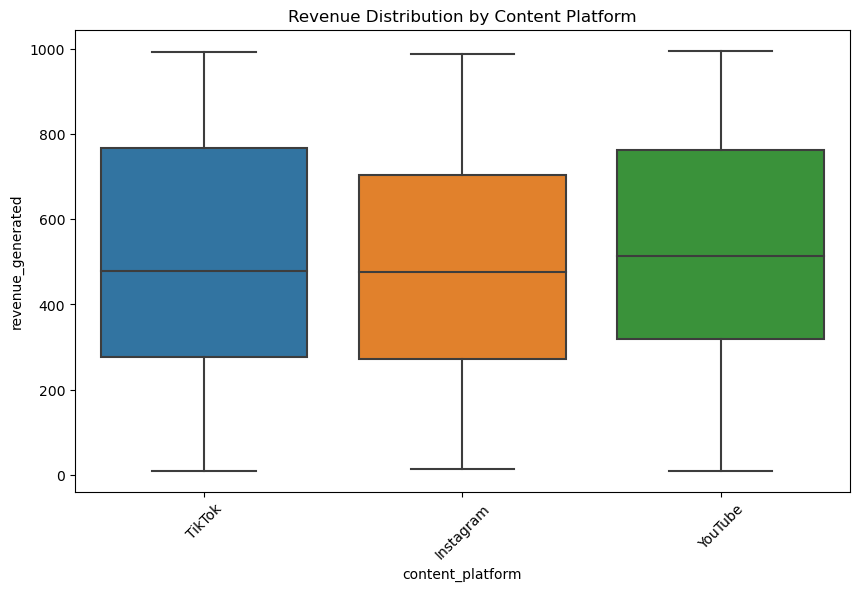

In [3]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='content_platform', y='revenue_generated', data=df)
plt.title("Revenue Distribution by Content Platform")
plt.xticks(rotation=45)
plt.show()


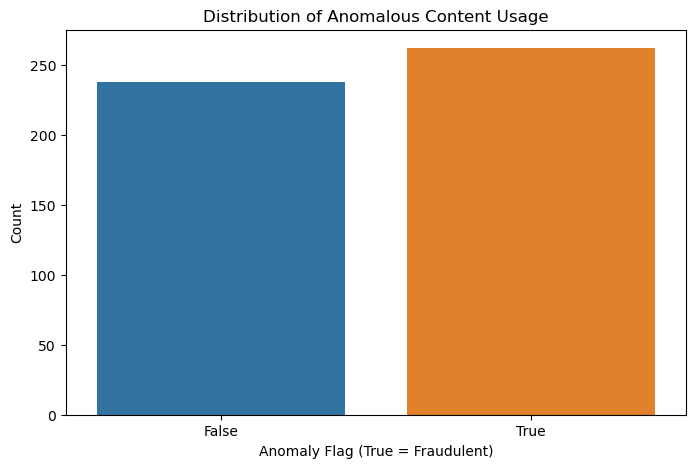

In [4]:
plt.figure(figsize=(8, 5))
sns.countplot(x='anomaly_flag', data=df)
plt.title("Distribution of Anomalous Content Usage")
plt.xlabel("Anomaly Flag (True = Fraudulent)")
plt.ylabel("Count")
plt.show()


In [5]:
# Prepare features and target
X = df[['likes', 'comments', 'revenue_generated']]
y = df['creator_id']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict and display accuracy
accuracy = clf.score(X_test, y_test)
print(f"Content Recognition Model Accuracy: {accuracy:.2f}")


Content Recognition Model Accuracy: 0.00


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


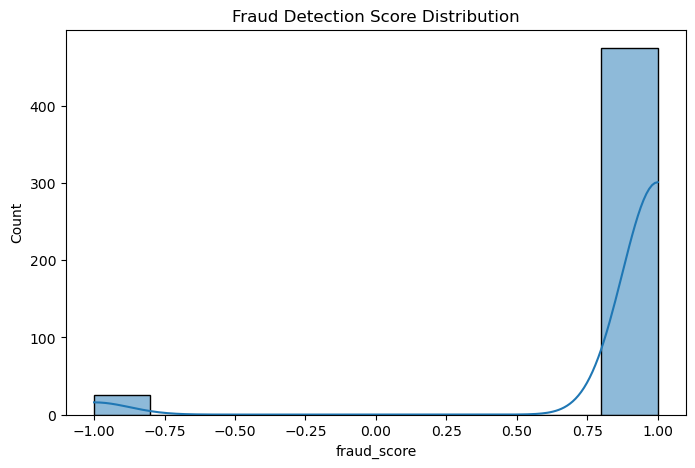

In [6]:
# Prepare features for fraud detection
X_fraud = df[['likes', 'comments', 'revenue_generated']]

# Train Isolation Forest Model
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['fraud_score'] = iso_forest.fit_predict(X_fraud)

# Visualize Fraud Scores
plt.figure(figsize=(8, 5))
sns.histplot(df['fraud_score'], bins=10, kde=True)
plt.title("Fraud Detection Score Distribution")
plt.show()


In [7]:
# Prepare features and target
X_rev = df[['likes', 'comments']]
y_rev = df['revenue_generated']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_rev, y_rev, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict revenue
y_pred = rf_model.predict(X_test)

# Display model performance
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Revenue Prediction Model MAE: {mae:.2f}")


Revenue Prediction Model MAE: 245.55


In [8]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
label_encoder = LabelEncoder()
df['creator_id_encoded'] = label_encoder.fit_transform(df['creator_id'])

# Prepare updated feature set
X = df[['likes', 'comments', 'revenue_generated', 'royalty_payout']]
y = df['creator_id_encoded']  # Target variable as numerical labels

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Updated Content Recognition Model Accuracy: {accuracy:.2f}")


Updated Content Recognition Model Accuracy: 0.00


In [10]:
df['creator_id'].value_counts()


CR001    1
CR330    1
CR343    1
CR342    1
CR341    1
        ..
CR162    1
CR161    1
CR160    1
CR159    1
CR500    1
Name: creator_id, Length: 500, dtype: int64

In [11]:
# Encoding categorical features
df['content_platform_encoded'] = label_encoder.fit_transform(df['content_platform'])
df['content_category_encoded'] = label_encoder.fit_transform(df['content_category'])
df['engagement_source_encoded'] = label_encoder.fit_transform(df['engagement_source'])


In [14]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)


In [13]:
!pip install imbalanced-learn


     -------------------------------------- 258.3/258.3 kB 8.0 MB/s eta 0:00:00
     -------------------------------------- 301.8/301.8 kB 9.1 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
